## Assignment 1

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

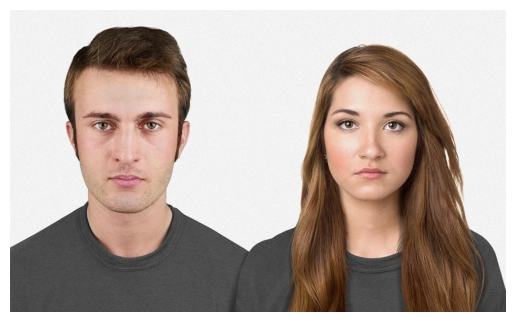

(605, 993, 3)

In [68]:
image = cv2.imread('../../fig/Human_3.png')  # BGR format
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
plt.imshow(image)
plt.axis('off')
plt.show()
image.shape

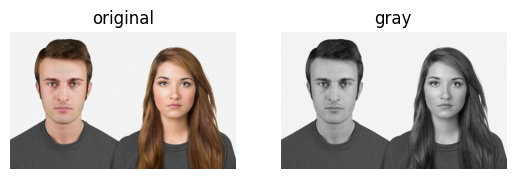

In [69]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Display results
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('gray')
plt.axis('off')
plt.show()

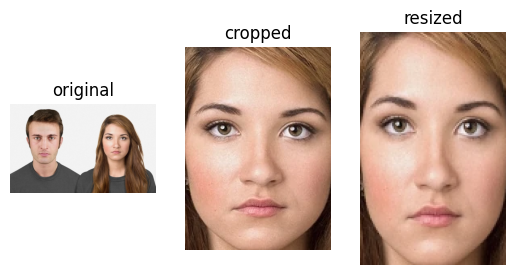

In [70]:
image_cropped = image[130:380, 630:810]
resized_cropped = cv2.resize(image_cropped, (100, 160))
original_cropped = cv2.resize(image_cropped, (180, 250))
# Display results
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title('original')
plt.axis('off')


plt.subplot(1, 3, 3)
plt.imshow(resized_cropped)
plt.title('resized')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(image_cropped)
plt.title('cropped')
plt.axis('off')
plt.show()

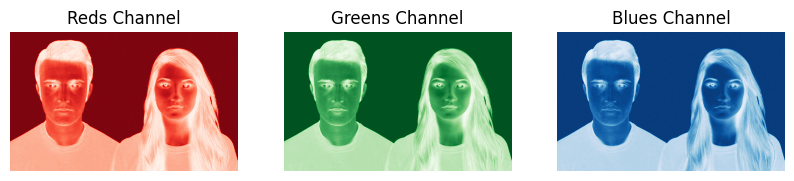

In [79]:
# Extract channels
blue_channel = image[:, :, 0]
green_channel = image[:, :, 1]
red_channel = image[:, :, 2]

# Display channels
plt.figure(figsize=(10, 4))
for i, (channel, color) in enumerate(zip([red_channel, green_channel, 
                                blue_channel], ['Reds', 'Greens', 'Blues'])):
    plt.subplot(1, 3, i+1)
    plt.imshow(channel, cmap=color)
    plt.title(f"{color} Channel")
    plt.axis('off')
plt.show()


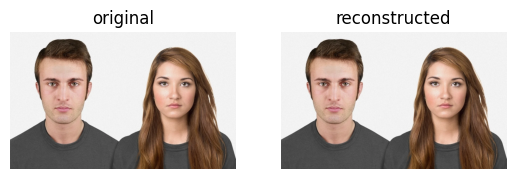

In [82]:
reconstructed_image = cv2.merge((blue_channel, green_channel, red_channel))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image)
plt.title('reconstructed')
plt.axis('off')
plt.show()

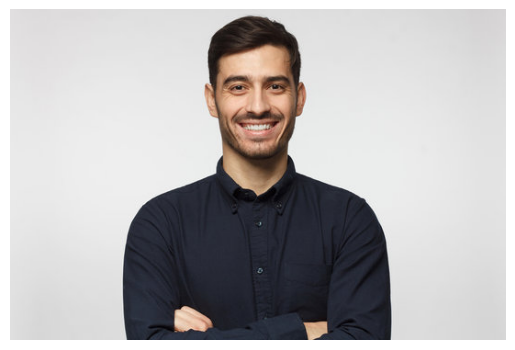

(360, 540, 3)

In [85]:
person1 = cv2.imread('../../fig/person1.jpg')  # BGR format
person1 = cv2.cvtColor(person1, cv2.COLOR_BGR2RGB)  # Convert to RGB
plt.imshow(person1)
plt.axis('off')
plt.show()
person1.shape

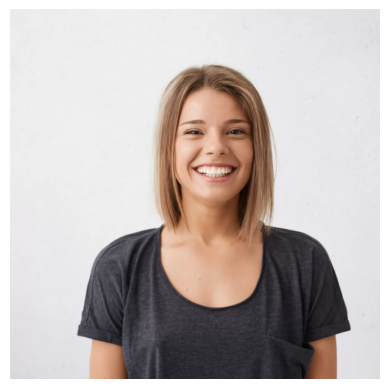

(1200, 1200, 3)

In [86]:
person2 = cv2.imread('../../fig/person2.jpg')  # BGR format
person2 = cv2.cvtColor(person2, cv2.COLOR_BGR2RGB)  # Convert to RGB
plt.imshow(person2)
plt.axis('off')
plt.show()
person2.shape

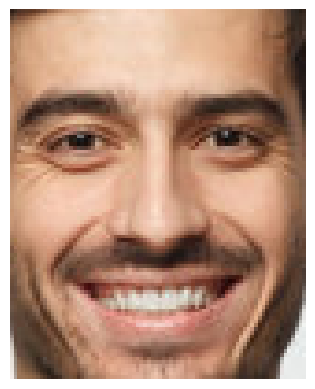

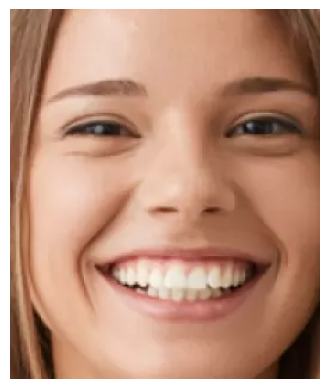

(100, 80, 3)
(310, 260, 3)


In [125]:
person1_face = person1[50:150, 230:310]
person2_face = person2[300:610, 520:780]
plt.imshow(person1_face)
plt.axis('off')
plt.show()
plt.imshow(person2_face)
plt.axis('off')
plt.show()
print(person1_face.shape)
print(person2_face.shape)

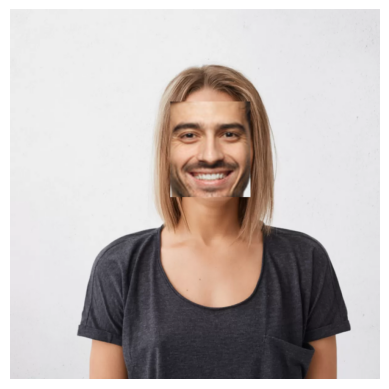

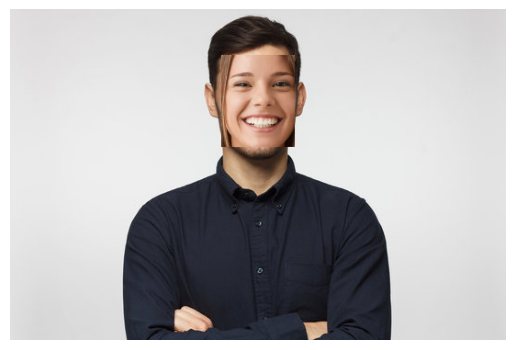

In [129]:
person1_face_in_person2_body = person2.copy()
person1_face = cv2.resize(person1_face, (260, 310))
person1_face_in_person2_body[300:610, 520:780] = person1_face
plt.imshow(person1_face_in_person2_body)
plt.axis('off')
plt.show()
person2_face_in_person1_body = person1.copy()
person2_face = cv2.resize(person2_face, (80, 100))
person2_face_in_person1_body[50:150, 230:310] = person2_face
plt.imshow(person2_face_in_person1_body)
plt.axis('off')
plt.show()

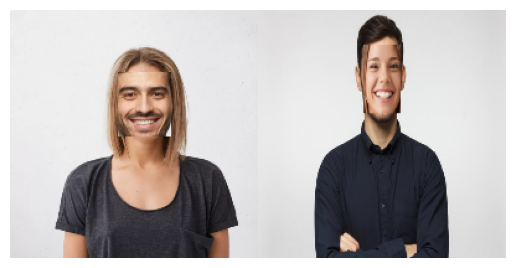

In [131]:
resized_collage1 = cv2.resize(person1_face_in_person2_body, (200, 200))
resized_collage2 = cv2.resize(person2_face_in_person1_body, (200, 200))

collage = np.hstack((resized_collage1, resized_collage2))

plt.imshow(collage)
plt.axis('off')
plt.show()

#### write-up:
Learned how to prepare image to further use. Matrix rgb representation. And how to do funny collages :)

## Assignement 2

In [142]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [143]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the data (scale pixel values between 0 and 1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Add a channel dimension (required for CNNs)
# CNNs expect the input image data to be in a specific format that includes 
# a channel dimension, even for grayscale images
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

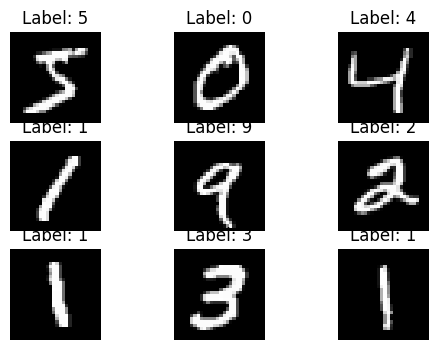

In [144]:
# Display a few training images
plt.figure(figsize=(6, 4))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i].squeeze(), cmap='gray')
    plt.title(f'Label: {y_train[i].argmax()}')
    plt.axis('off')
plt.show()

In [145]:
# Define the CNN architecture
model = models.Sequential([
    # Convolutional Layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    # Pooling Layer
    layers.MaxPooling2D((2, 2)),
    
    # Add another Conv layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    # Pooling Layer
    layers.MaxPooling2D((2, 2)),
    
     # Convolutional Layer 3 (Additional Layer)
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Flatten the output
    layers.Flatten(),
     # Fully Connected Layer 1
    layers.Dense(256, activation='relu'),  # Increased number of neurons

    # Fully Connected Layer 2
    layers.Dense(128, activation='relu'),
    
    # Output Layer
    layers.Dense(10, activation='softmax')  # 10 classes (digits 0-9)
])

In [146]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 159,882 (624.54 KB)

 Trainable params: 159,882 (624.54 KB)

 Non-trainable params: 0 (0.00 B)

In [147]:
# Compile the model

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [148]:
# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.8530 - loss: 0.4596 - val_accuracy: 0.9727 - val_loss: 0.0923
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9754 - loss: 0.0772 - val_accuracy: 0.9826 - val_loss: 0.0561
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9839 - loss: 0.0508 - val_accuracy: 0.9802 - val_loss: 0.0660
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9872 - loss: 0.0390 - val_accuracy: 0.9843 - val_loss: 0.0515
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9895 - loss: 0.0333 - val_accuracy: 0.9850 - val_loss: 0.0493


In [150]:
# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_accuracy:.2f}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9813 - loss: 0.0681
Test Accuracy: 0.98


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


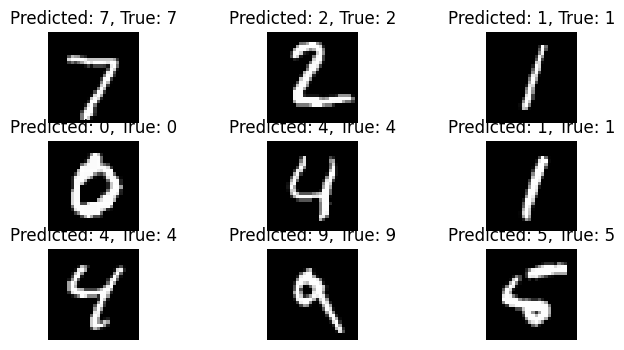

In [151]:
# Make predictions
predictions = model.predict(x_test)

# Display a few test images with predictions
plt.figure(figsize=(8, 4))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_test[i].squeeze(), cmap='gray')
    plt.title(f'Predicted: {predictions[i].argmax()}, True: {y_test[i].argmax()}')
    plt.axis('off')
plt.show()


### Observations:
Adding more layers made the model less accurate. But it still does a good job predicting the test set

In [153]:
# Load CIFAR dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize the data (scale pixel values between 0 and 1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Add a channel dimension (required for CNNs)
# CNNs expect the input image data to be in a specific format that includes 
# a channel dimension, even for grayscale images
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 59s 0us/step


In [166]:
print(x_train.shape)
x_test.shape

(50000, 32, 32, 3, 1)


(10000, 32, 32, 3, 1)

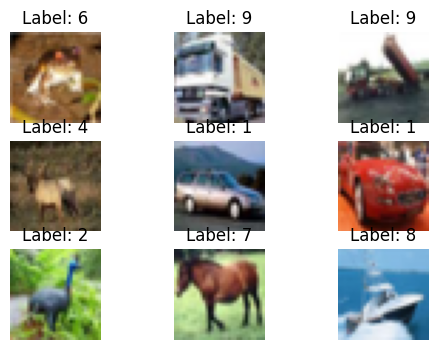

In [154]:
# Display a few training images
plt.figure(figsize=(6, 4))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i].squeeze(), cmap='gray')
    plt.title(f'Label: {y_train[i].argmax()}')
    plt.axis('off')
plt.show()

In [162]:
# Define the CNN architecture
model = models.Sequential([
    # Convolutional Layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    # Pooling Layer
    layers.MaxPooling2D((2, 2)),
    
    # Add another Conv layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    # Pooling Layer
    layers.MaxPooling2D((2, 2)),
    
     # Convolutional Layer 3 (Additional Layer)
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Flatten the output
    layers.Flatten(),
     # Fully Connected Layer 1
    layers.Dense(256, activation='relu'),  # Increased number of neurons

    # Fully Connected Layer 2
    layers.Dense(128, activation='relu'),
    
    # Output Layer
    layers.Dense(10, activation='softmax')  # 10 classes (digits 0-9)
])

In [163]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 258,762 (1010.79 KB)

 Trainable params: 258,762 (1010.79 KB)

 Non-trainable params: 0 (0.00 B)

In [164]:
# Compile the model

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [165]:
# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.3271 - loss: 1.8038 - val_accuracy: 0.5155 - val_loss: 1.3412
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.5627 - loss: 1.2163 - val_accuracy: 0.6059 - val_loss: 1.1188
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.6331 - loss: 1.0344 - val_accuracy: 0.6174 - val_loss: 1.0921
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.6827 - loss: 0.8921 - val_accuracy: 0.6589 - val_loss: 0.9891
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.7162 - loss: 0.7953 - val_accuracy: 0.6801 - val_loss: 0.9186


In [167]:
# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_accuracy:.2f}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6814 - loss: 0.9281
Test Accuracy: 0.68


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


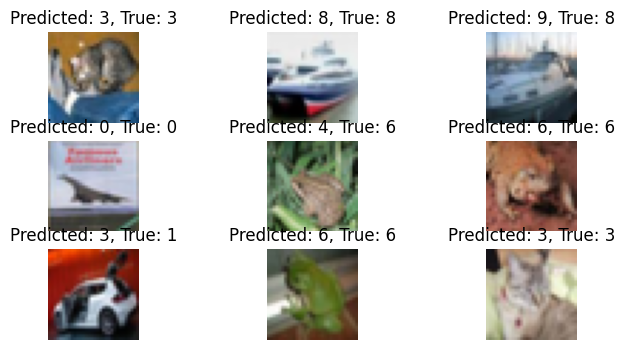

In [168]:
# Make predictions
predictions = model.predict(x_test)

# Display a few test images with predictions
plt.figure(figsize=(8, 4))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_test[i].squeeze(), cmap='gray')
    plt.title(f'Predicted: {predictions[i].argmax()}, True: {y_test[i].argmax()}')
    plt.axis('off')
plt.show()


#### Observations:
We see that the accuracy is not so great. Maybe changing some filters and the optimizer or adding/removing some layers, will increase the accuracy we get.